# Image Classification (CNN - Convential Neural Network)

<img src=https://i.imgur.com/7HRCH08.jpg>

This Project has 6 Category of images in dataset which are 
{ buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'}.

TensorFlow is utilized to build Convential Neural Network



# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os

# Visualize Data and File Paths


In [2]:
dir_path ='Intel Image Classification -CNN and Scikit Learn'

In [3]:
train_path = dir_path + '/seg_train'+ '/seg_train/'

In [4]:
test_path = dir_path + '/seg_test'+ '/seg_test/'

In [5]:
train_sample_image_no  = os.listdir(train_path + '/buildings/' )[2000]
train_sample_image_no


'8382.jpg'

In [6]:
train_sample_image = train_path +'buildings/'+ train_sample_image_no

In [7]:
imread(train_sample_image)

array([[[  9,   7,   0],
        [ 11,  12,   4],
        [  6,   8,   5],
        ...,
        [100,  79,  78],
        [ 38,  28,  29],
        [ 53,  50,  43]],

       [[  9,   8,   3],
        [  8,   9,   4],
        [ 15,  15,  13],
        ...,
        [ 48,  31,  23],
        [ 31,  21,  19],
        [ 40,  36,  35]],

       [[  8,   9,  11],
        [ 14,  14,  14],
        [  4,   2,   3],
        ...,
        [ 52,  39,  23],
        [ 67,  60,  52],
        [ 44,  38,  38]],

       ...,

       [[ 22,  23,  18],
        [ 17,  18,  13],
        [  9,  10,   5],
        ...,
        [  8,   5,   0],
        [ 43,  40,  35],
        [  7,   4,   0]],

       [[  5,   6,   1],
        [ 21,  22,  17],
        [ 10,  11,   6],
        ...,
        [ 80,  75,  69],
        [ 50,  47,  40],
        [ 23,  20,  13]],

       [[  9,   9,   7],
        [  7,   7,   5],
        [  0,   0,   0],
        ...,
        [ 27,  22,  16],
        [ 32,  28,  19],
        [ 58,  54,  45]]

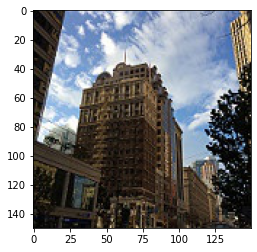

In [8]:
plt.imshow(imread(train_sample_image))

**Let's check how many images there are.**

In [9]:
total_images_train_list = []
total_images_test_list = []
categories = ['buildings','forest','glacier','mountain','sea','street']
for n in categories:
  total_images_train_list.append(len(os.listdir(train_path + n )))
  total_images_test_list.append(len(os.listdir(test_path + n )))
  


In [10]:
train_total_images = sum(total_images_train_list)
train_total_images

14034

In [11]:
test_total_images=sum(total_images_test_list)
test_total_images

3000

### Image Shape

In [12]:
imread(train_sample_image).shape

(150, 150, 3)

In [13]:
image_size = (150,150)

In [14]:
imread(train_sample_image).max()

255

In [15]:
imread(train_sample_image).min()

0

# Image Generator

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
image_generator = ImageDataGenerator(rotation_range=20,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1, 
                                     shear_range=0.1, 
                                     zoom_range=0.1, 
                                     fill_mode='nearest',
                                     rescale=1/255 )

### Original Image

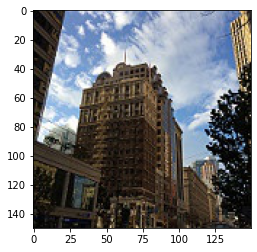

In [18]:
plt.imshow(imread(train_sample_image))

### Image Generated from Image Generator

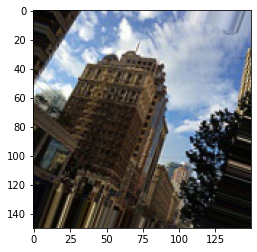

In [19]:
plt.imshow(image_generator.random_transform(imread(train_sample_image)))

# Generating many manipulated images from a directory & Categorizing Classes

In [20]:
batch_size=256

In [21]:
train_generator = image_generator.flow_from_directory(train_path,target_size=image_size,class_mode='categorical',batch_size=batch_size)

Found 14034 images belonging to 6 classes.


In [22]:
test_generator = image_generator.flow_from_directory(test_path,target_size=image_size,class_mode='categorical',batch_size=batch_size, shuffle=False)

Found 3000 images belonging to 6 classes.


# Create Model


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
model = Sequential()

model.add(Conv2D(filters= 256, kernel_size=(4,4), strides=(2,2), activation= 'relu', padding='same', input_shape=(150,150,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters= 256, kernel_size=(4,4), strides=(2,2), activation= 'relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters= 128, kernel_size=(3,3), strides=(2,2), activation= 'relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.1))

model.add(Conv2D(filters= 128, kernel_size=(3,3), strides=(2,2), activation= 'relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.1))

model.add(Conv2D(filters= 64, kernel_size=(2,2), strides=(1,1), activation= 'relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.1))

model.add(Conv2D(filters= 64, kernel_size=(2,2), strides=(1,1), activation= 'relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))


model.add(Dense(64,activation='relu'))

model.add(Dense(6, activation = 'softmax'))

model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics = ['accuracy'])

In [25]:
early_stop = EarlyStopping(patience=2, monitor ='val_loss')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 75, 75, 256)       12544     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 37, 37, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 19, 256)       1048832   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 256)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 9, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 128)         2

In [27]:
model.fit(train_generator,epochs=25,verbose=2,validation_data=test_generator)

Epoch 1/25
55/55 - 505s - loss: 1.6258 - accuracy: 0.3253 - val_loss: 1.2571 - val_accuracy: 0.5130
Epoch 2/25
55/55 - 495s - loss: 1.1663 - accuracy: 0.5401 - val_loss: 1.0415 - val_accuracy: 0.5697
Epoch 3/25
55/55 - 492s - loss: 1.0295 - accuracy: 0.5928 - val_loss: 0.9657 - val_accuracy: 0.6193
Epoch 4/25
55/55 - 485s - loss: 0.9510 - accuracy: 0.6270 - val_loss: 0.9726 - val_accuracy: 0.6237
Epoch 5/25
55/55 - 487s - loss: 0.8707 - accuracy: 0.6749 - val_loss: 0.8535 - val_accuracy: 0.6843
Epoch 6/25
55/55 - 482s - loss: 0.8220 - accuracy: 0.6946 - val_loss: 0.7812 - val_accuracy: 0.7193
Epoch 7/25
55/55 - 489s - loss: 0.7918 - accuracy: 0.7084 - val_loss: 0.7363 - val_accuracy: 0.7277
Epoch 8/25
55/55 - 488s - loss: 0.7297 - accuracy: 0.7359 - val_loss: 0.6775 - val_accuracy: 0.7530
Epoch 9/25
55/55 - 625s - loss: 0.6863 - accuracy: 0.7529 - val_loss: 0.6650 - val_accuracy: 0.7610
Epoch 10/25
55/55 - 671s - loss: 0.6487 - accuracy: 0.7695 - val_loss: 0.6368 - val_accuracy: 0.7650

# Evaluating Model

In [28]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,1.625753,0.325281,1.257136,0.513000
1,1.166285,0.540117,1.041463,0.569667
2,1.029468,0.592846,0.965678,0.619333
3,0.951048,0.627049,0.972613,0.623667
4,0.870668,0.674861,0.853527,0.684333
5,0.822044,0.694599,0.781162,0.719333
6,0.791828,0.708351,0.736301,0.727667
7,0.729661,0.735927,0.677526,0.753000
8,0.686338,0.752886,0.664991,0.761000
9,0.648705,0.769488,0.636817,0.765000


In [29]:
losses.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<AxesSubplot:>

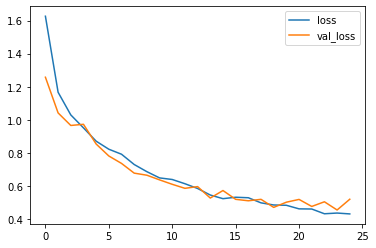

In [30]:
losses[['loss', 'val_loss']].plot()

<AxesSubplot:>

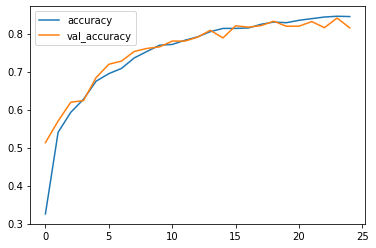

In [31]:
losses[['accuracy', 'val_accuracy']].plot()

In [32]:
true_prediction = test_generator.classes
true_prediction

array([0, 0, 0, ..., 5, 5, 5])

In [33]:
prediction = model.predict_classes(test_generator)
prediction

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([0, 0, 0, ..., 3, 0, 1], dtype=int64)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [36]:
print(classification_report(true_prediction,prediction))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76       437
           1       0.92      0.98      0.95       474
           2       0.76      0.78      0.77       553
           3       0.73      0.79      0.76       525
           4       0.92      0.63      0.75       510
           5       0.83      0.88      0.85       501

    accuracy                           0.81      3000
   macro avg       0.81      0.81      0.81      3000
weighted avg       0.81      0.81      0.81      3000



In [37]:
confusion_matrix(true_prediction,prediction)

array([[351,  12,   1,   3,   1,  69],
       [  3, 465,   1,   2,   0,   3],
       [ 21,   5, 430,  74,  14,   9],
       [ 25,   5,  67, 413,  13,   2],
       [ 41,   9,  64,  67, 320,   9],
       [ 40,   9,   5,   4,   1, 442]], dtype=int64)

<AxesSubplot:>

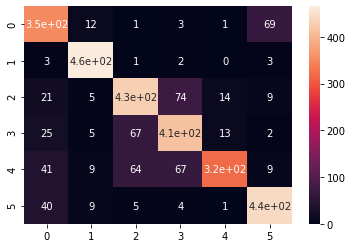

In [38]:
sns.heatmap(confusion_matrix(true_prediction,prediction),annot=True)

# Predicting on an Image - Test 1 

In [66]:
pred_image = test_path+ 'street/'+ '20903.jpg'
pred_image

'Intel Image Classification -CNN and Scikit Learn/seg_test/seg_test/street/20903.jpg'

In [67]:
from tensorflow.keras.preprocessing import image

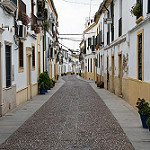

In [68]:
my_image =image.load_img(pred_image,target_size=image_size)
my_image

In [69]:
type(my_image)

PIL.JpegImagePlugin.JpegImageFile

In [70]:
my_image = image.img_to_array(my_image)

In [71]:
my_image.shape

(150, 150, 3)

In [72]:
my_image = my_image.reshape(1,150,150,3)
my_image.shape

(1, 150, 150, 3)

In [73]:
test_generator.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [74]:
model.predict(my_image) #Answer is Street.

array([[0., 0., 0., 0., 0., 1.]], dtype=float32)

### Wow. Result is Accurate

# Predicting on an Image - Test 2

In [117]:
pred_image = test_path+ 'forest/'+ '20225.jpg'
pred_image

'Intel Image Classification -CNN and Scikit Learn/seg_test/seg_test/forest/20225.jpg'

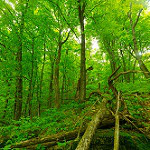

In [118]:
my_image =image.load_img(pred_image,target_size=image_size)
my_image

In [119]:
my_image = image.img_to_array(my_image)

In [120]:
my_image.shape

(150, 150, 3)

In [121]:
my_image = my_image.reshape(1,150,150,3)
my_image.shape

(1, 150, 150, 3)

In [122]:
test_generator.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [124]:
model.predict(my_image) #Answer is Forest.

array([[0., 1., 0., 0., 0., 0.]], dtype=float32)

## Wow. Result is Accurate and Good for Api Deployment.


